# Brain Scan Dataset


Link to Dataset: https://www.kaggle.com/datasets/ahmedhamada0/brain-tumor-detection

Data consists of 3,000 brain MRI images:

* 1,500 images of MRI scans without a brain tumor
   
   
* 1,500 images of MRI scans with a brain tumor

Data is labeled as (0) for MRI scans without a brain tumor and (1) for MRI scans with a brain tumor

In [1]:
import joblib as jlb
from aitk.utils import gallery, array_to_image
from aitk.networks import Network

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

from sklearn.model_selection import train_test_split
from time import sleep

import pandas as pd 
import numpy as np
%matplotlib inline
from tensorflow.keras.preprocessing import image
from numpy import asarray
import cv2
import PIL
from PIL import Image

# Get the Data

In [2]:
img_dir='/scratch/slevy1/data/'
no_images=os.listdir(img_dir + 'no/')
yes_images=os.listdir(img_dir + 'yes/')

In [3]:
data =[]
labels = []

Get non-tumor data loaded

In [4]:
sum = 0
for image_name in no_images:
    image=cv2.imread(img_dir + 'no/' +image_name)
    image=Image.fromarray(image,'RGB')
    image=image.resize((64,64))
    data.append(np.array(image))
    labels.append(0)
    sum += 1
print("Number of non-tumor brain scans:", sum)

Number of non-tumor brain scans: 1500


Get tumor data loaded

In [5]:
sum = 0
for image_name in yes_images:
    image=cv2.imread(img_dir + 'yes/' +image_name)
    image=Image.fromarray(image,'RGB')
    image=image.resize((64,64))
    data.append(np.array(image))
    labels.append(1)
    sum+= 1
print(sum)

1500


In [6]:
data_array=np.asarray(data)
label_array=np.asarray(labels)

Print shape of arrays

In [7]:
print(data_array.shape, label_array.shape)

(3000, 64, 64, 3) (3000,)


In [8]:
x_train, x_test, y_train, y_test = train_test_split(data_array, label_array, test_size = 0.2)

In [9]:
x_train.shape

(2400, 64, 64, 3)

In [10]:
x_test.shape

(600, 64, 64, 3)

In [28]:
y_test.shape

(600,)

In [29]:
y_train.shape

(2400,)

In [11]:
y_train[:10]

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 0])

0,1,2,3
4,5,6,7
8,9,10,11

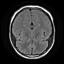
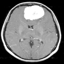
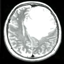
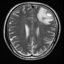
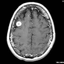
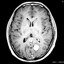
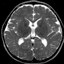
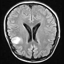
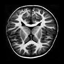
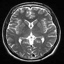
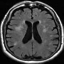
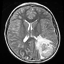

In [12]:
images = [array_to_image(x_train[i]) for i in range(12)]
gallery(images)

In [13]:
num_categories = len(set(y_train))
print("Number of output categories: ",num_categories)

Number of output categories:  2


# Construct Model

In [15]:
brain_model = Sequential()
brain_model.add(Conv2D(6,(3,3), activation="relu", input_shape=(64,64,3), name = "conv2d"))
brain_model.add(MaxPooling2D(pool_size=(2,2), name= "maxpooling2d"))
brain_model.add(Flatten())
brain_model.add(Dense(64,activation="relu"))
brain_model.add(Dense(2,activation="softmax"))
brain_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 6)         168       
                                                                 
 maxpooling2d (MaxPooling2D)  (None, 31, 31, 6)        0         
                                                                 
 flatten_1 (Flatten)         (None, 5766)              0         
                                                                 
 dense_2 (Dense)             (None, 64)                369088    
                                                                 
 dense_3 (Dense)             (None, 2)                 130       
                                                                 
Total params: 369,386
Trainable params: 369,386
Non-trainable params: 0
_________________________________________________________________


# Compile the model

In [16]:
brain_model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Create aitk Network

In [17]:
net = Network(brain_model)


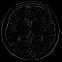
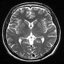

In [27]:
for i in range(10):
    net.propagate(x_train[i])
    net.display(x_train[i])
    sleep(1.0)

#  Train the model

In [19]:
history = net.fit(x_train, y_train, verbose = 1,
                    validation_data = (x_test, y_test),
                    epochs=10)

Epoch 10/10 loss: 0.0690028965473175 - accuracy: 0.9929166436195374 - val_loss: 0.5924692749977112 - val_accuracy: 0.971666693687439


# Inspect the feature maps

0,1,2,3
4,5,6,7
8,9,10,11

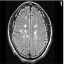
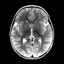
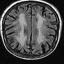
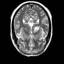
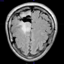
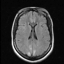
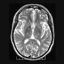
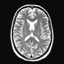
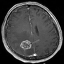
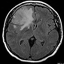
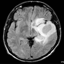
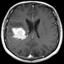

In [20]:
images = [array_to_image(x_test[i]) for i in range(12)]
gallery(images)

channel0,channel1,channel2,channel3,channel4,channel5

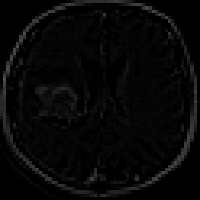
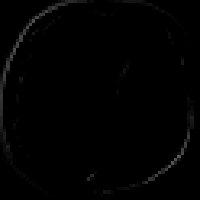
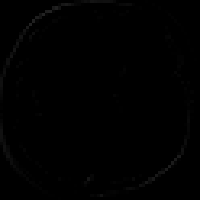
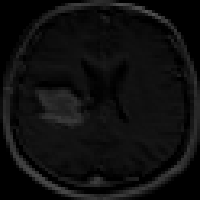
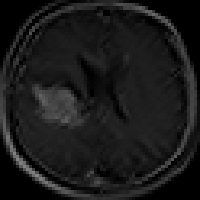
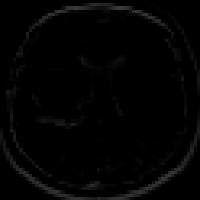

In [21]:
images = [net.propagate_to(x_test[11], "conv2d","image", channel=channel)
    for channel in range(6)]
bigger = [image.resize((200,200),resample=0) for image in images]
gallery(bigger, labels="channel{index}", gallery_shape=(6,1))

channel0,channel1,channel2,channel3,channel4,channel5

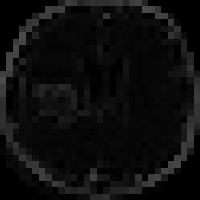
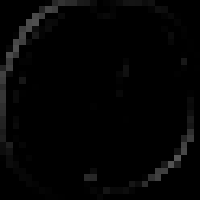
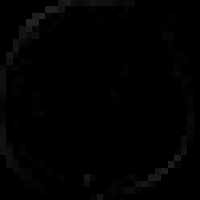
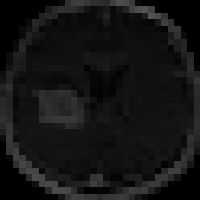
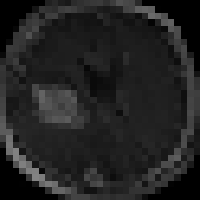
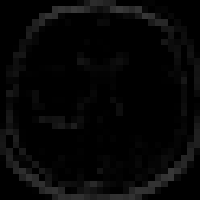

In [22]:
images = [net.propagate_to(x_test[11], "maxpooling2d", "image", channel=channel)
         for channel in range(6)]
bigger = [image.resize((200,200),resample=0) for image in images]
gallery(bigger, labels="channel{index}", gallery_shape=(6,1))
output = net.predict(x_test)

# Examine the results

In [32]:
from numpy import argmax
outputs = net.predict(x_test)
answers = [argmax(output) for output in outputs]
targets = y_test

In [33]:
incorrect = [i for i in range(len(answers)) if answers[i] != targets[i]]
wrong_ans = [answers[i] for i in incorrect]
len(incorrect)

17

1,1,0,1,1
1,1,0,1,1
1,1,0,1,1
1,1,,,

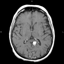
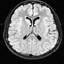
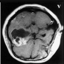
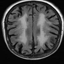
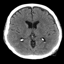
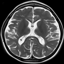
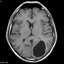
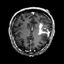
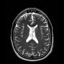
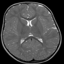
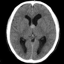
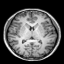
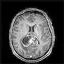
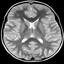
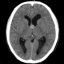
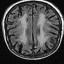
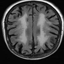

In [34]:
images = [array_to_image(x_test[index]) for index in incorrect]
gallery(images, labels=wrong_ans)